In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
#for row in data:
data['mean_deltawinrate'] = None
data['mean_deltaScore50p'] = None
data['mean_deltascoreLead'] = None
data['dispersy_scoreLead'] = None
data['beautiful_percent'] = None
data['beautifulS_percent'] = None
data['mean_utility'] = None
data['Score25p'] = None
data['Score75p'] = None
data['Winrate25p'] = None
data['Winrate75p'] = None
data['mean_deltawinrate50p'] = None
data['median_scorelead'] = None
data['length'] = None
data['chiselka'] = None
data['mean_deltaSelfPlay'] = None

for i, row in data.iterrows():
  row['W_scoreLead'] = [float(x) for x in row['W_scoreLead'].split()]
  row['B_scoreLead'] = [float(x) for x in row['B_scoreLead'].split()]
  row['W_scoreSelfplay'] = [float(x) for x in row['W_scoreSelfplay'].split()]
  row['B_scoreSelfplay'] = [float(x) for x in row['B_scoreSelfplay'].split()]
  row['W_scoreStdev'] = [float(x) for x in row['W_scoreStdev'].split()]
  row['B_scoreStdev'] = [float(x) for x in row['B_scoreStdev'].split()]
  row['W_utility'] = [float(x) for x in row['W_utility'].split()]
  row['B_utility'] = [float(x) for x in row['B_utility'].split()]
  row['W_winrate'] = [float(x) for x in row['W_winrate'].split()]
  row['B_winrate'] = [float(x) for x in row['B_winrate'].split()]
  row['length'] = len(row['W_winrate']) + len(row['B_winrate'])
  if (row['W_rating'][1] == 'k'):
    row['chiselka'] = -int(row['W_rating'][0]) + 1
  else:
    row['chiselka'] = int(row['W_rating'][0])
  sum_win = 0
  cnt_beautiful = 0
  cnt_beautifulS = 0
  winrate_delta = []
  for i in range(min(len(row['W_winrate']), len(row['B_winrate']))):
    if (i != 0):
        winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
        cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
        cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
  row['mean_deltawinrate'] = np.mean(winrate_delta)  
  row['beautiful_percent'] = cnt_beautiful / (len(row['W_winrate']) - 1) 
  row['beautifulS_percent'] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
  sum_scoreLead = 0
  score_S = []
  scoreSelfplay = []
  utility = []
  for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
    if (i != 0):
        score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
        scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
        utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

  score_S.sort()
  winrate_delta.sort()

  row['Score25p'] = score_S[int(len(score_S) * 0.25)]
  row['Score75p'] = score_S[int(len(score_S) * 0.75)]

  row['Winrate25p'] = winrate_delta[int(len(score_S) * 0.25)]
  row['Winrate75p'] = winrate_delta[int(len(score_S) * 0.75)]


  row['median_scorelead'] =  score_S[int(len(score_S) * 0.5)] 
  row['mean_deltascoreLead'] = np.mean(score_S)
  row['mean_deltaSelfPlay'] = np.mean(scoreSelfplay)
  if (row['length'] > 4):
    row['mean_deltaScore50p'] = np.mean(score_S[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
    row['mean_deltawinrate50p'] = np.mean(winrate_delta[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
  else:
    row['mean_deltawinrate50p'] = 0
    row['mean_deltaScore50p'] = 0;
  
  dispersy_scoreLead = 0
  for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
    if (i != 0):
        dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1] - row['mean_deltascoreLead']) ** 2
  row['dispersy_scoreLead'] = dispersy_scoreLead / (len(row['W_scoreLead']) - 1) 
  row['mean_utility'] = np.mean(utility)
#data = data[data['length'] > 50]

In [21]:
aggreg = data.groupby(['chiselka']).agg({'mean_deltawinrate' : 'mean', 'mean_deltascoreLead': 'mean', 'dispersy_scoreLead' : 'mean', 
                                'beautiful_percent': 'mean', 'mean_utility' : 'mean', 'beautifulS_percent': 'mean',
                                'Score25p': 'mean', 'Score75p' : 'mean', 'median_scorelead' : 'mean', 'mean_deltaScore50p': 'mean', 
                                'mean_deltaSelfPlay' : 'mean', 'Winrate25p': 'mean', 'Winrate75p' : 'mean', 'mean_deltawinrate50p' : 'mean'})
aggreg.head(15)

,mean_deltawinrate,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,mean_utility,beautifulS_percent,Score25p,Score75p,median_scorelead,mean_deltaScore50p,mean_deltaSelfPlay,Winrate25p,Winrate75p,mean_deltawinrate50p
chiselka,,,,,,,,,,,,,,
-2,-0.035314,-2.183407,42.702605,0.367597,-0.074241,0.301012,-3.954577,0.392980,-1.207856,-1.467028,-2.177311,-0.050562,0.003320,-0.013907
-1,-0.034245,-1.987741,39.251511,0.367696,-0.071675,0.307793,-3.745172,0.477634,-1.112043,-1.354041,-1.995643,-0.050589,0.003650,-0.014491
0,-0.032597,-1.897422,39.242146,0.376050,-0.068090,0.316005,-3.609322,0.513638,-1.043838,-1.280854,-1.897918,-0.050081,0.004576,-0.013408
1,-0.033738,-1.947955,37.278701,0.374598,-0.070520,0.314738,-3.625081,0.494577,-1.053668,-1.292553,-1.949375,-0.048788,0.003741,-0.013360
2,-0.036635,-1.853020,38.378748,0.379543,-0.076505,0.303789,-3.405929,0.422935,-1.015039,-1.234128,-1.817316,-0.058263,0.004388,-0.016300
3,-0.037968,-1.919132,33.032777,0.387114,-0.080480,0.272524,-3.480999,0.271002,-1.170722,-1.374859,-1.765036,-0.061639,0.003157,-0.018490
4,-0.039107,-1.800948,33.079959,0.384266,-0.082733,0.274848,-3.342152,0.303585,-1.100064,-1.290156,-1.761716,-0.063014,0.002873,-0.019576
5,-0.038674,-1.666958,31.230848,0.372038,-0.081613,0.276351,-3.109672,0.267787,-1.035928,-1.210648,-1.657576,-0.065542,0.003012,-0.020496
6,-0.034832,-1.504225,26.517431,0.379253,-0.073417,0.281126,-2.916851,0.302008,-0.949289,-1.114549,-1.433291,-0.060304,0.003953,-0.018304


Список текущих характеристик:

**mean_deltawinrate** - средняя сила хода в процентах.

**mean_deltascoreLead** - средняя сила хода в очках.

**dispersy_scoreLead** - дисперсия силы хода в очках.

**beautiful_percent** - процент ходов после которых винрейт повышается.

**beautiful_percentS** - процент ходов после которых ожидаемый счет увеличивается.


**Score25p,	Score75p,	median_scorelead** - соответственно 25, 75 и 50% квантили силы хода в очках.

**Winrate25p	Winrate75p	mean_deltawinrate50p** - то же самое для винрейта.


In [22]:
ranks = ["3k", "2k", "1k", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]

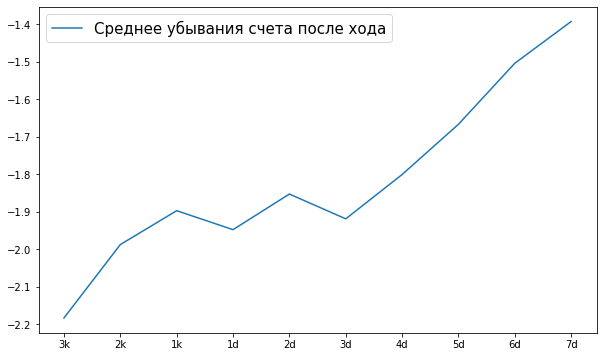

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ranks, aggreg["mean_deltascoreLead"], label = "Среднее убывания счета после хода")
plt.legend(fontsize =  15)
plt.show()

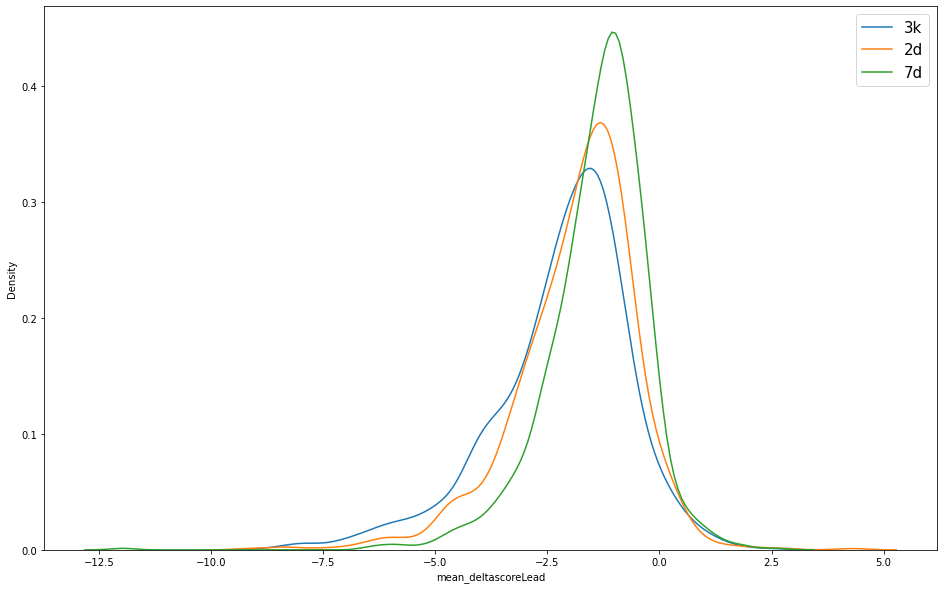

In [15]:
import seaborn as sns
data_3k = data[data['W_rating'] == '3k']
data_2d = data[data['W_rating'] == '2d']
data_7d = data[data['W_rating'] == '7d']
df = pd.DataFrame({
    '3k': data_3k['mean_deltascoreLead'],
    '2d': data_2d['mean_deltascoreLead'],
    '7d': data_7d['mean_deltascoreLead']
})
fig, ax = plt.subplots(figsize=(16, 10))
sns.kdeplot(data_3k['mean_deltascoreLead'], ax = ax, label = "3k")
sns.kdeplot(data_2d['mean_deltascoreLead'], ax = ax, label = "2d")
sns.kdeplot(data_7d['mean_deltascoreLead'], ax = ax, label = "7d")
#ax = df.plot(figsize = (20, 10)).kde()
plt.legend(fontsize =  15)
plt.show()

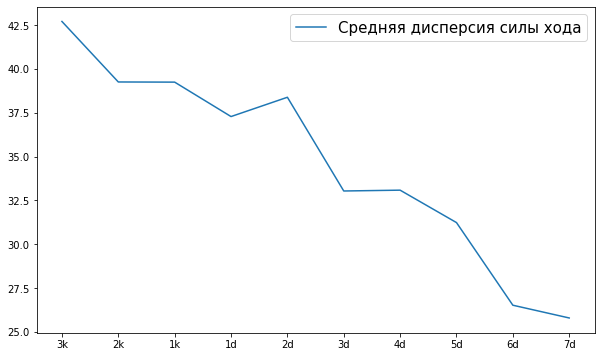

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ranks, aggreg["dispersy_scoreLead"], label = "Средняя дисперсия силы хода")
plt.legend(fontsize =  15)
plt.show()

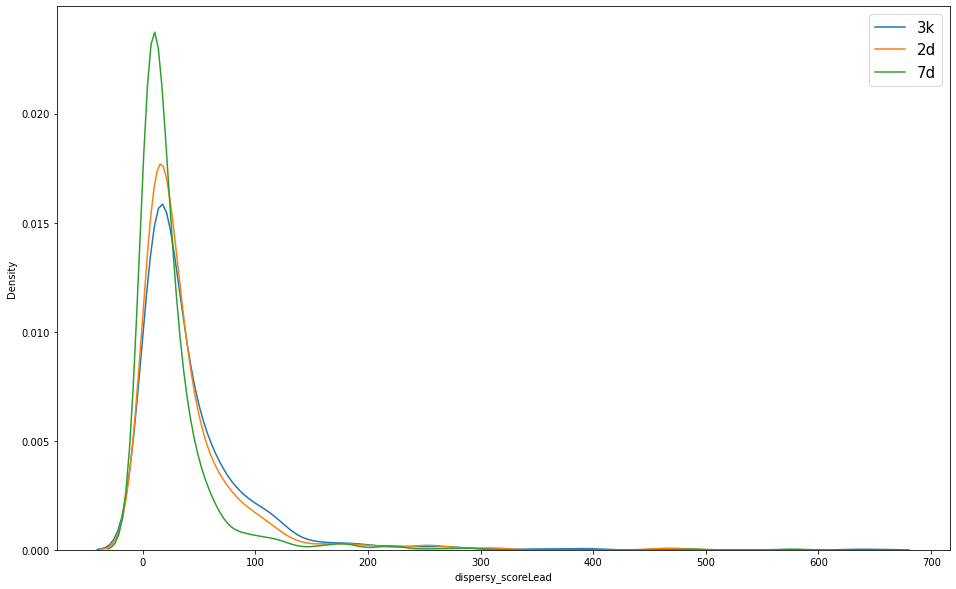

In [17]:
import seaborn as sns
data_3k = data[data['W_rating'] == '3k']
data_2d = data[data['W_rating'] == '2d']
data_7d = data[data['W_rating'] == '7d']
fig, ax = plt.subplots(figsize=(16, 10))
sns.kdeplot(data_3k['dispersy_scoreLead'], ax = ax, label = "3k")
sns.kdeplot(data_2d['dispersy_scoreLead'], ax = ax, label = "2d")
sns.kdeplot(data_7d['dispersy_scoreLead'], ax = ax, label = "7d")
#ax = df.plot(figsize = (20, 10)).kde()
plt.legend(fontsize =  15)
plt.show()

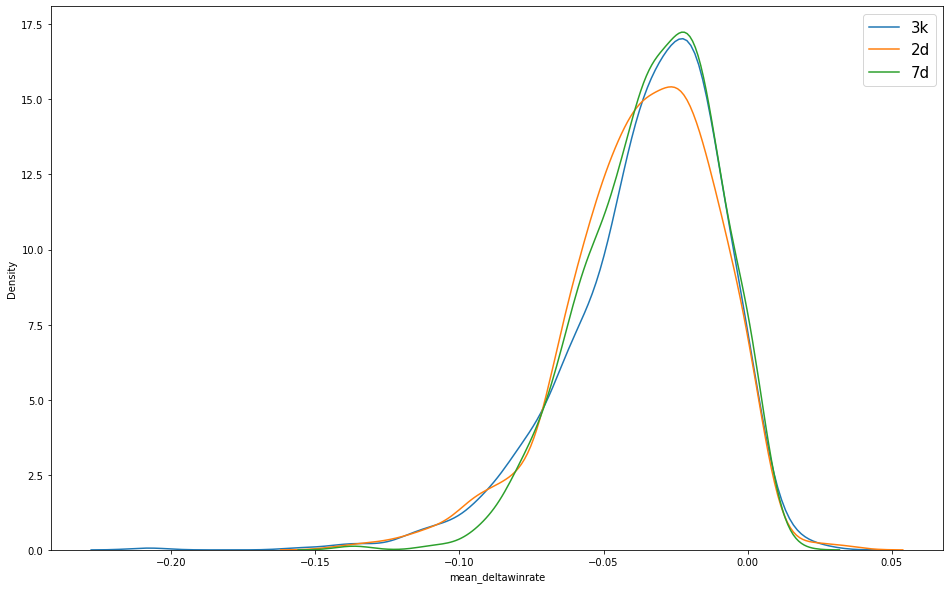

In [18]:
import seaborn as sns
data_3k = data[data['W_rating'] == '3k']
data_2d = data[data['W_rating'] == '2d']
data_7d = data[data['W_rating'] == '7d']
fig, ax = plt.subplots(figsize=(16, 10))
sns.kdeplot(data_3k['mean_deltawinrate'], ax = ax, label = "3k")
sns.kdeplot(data_2d['mean_deltawinrate'], ax = ax, label = "2d")
sns.kdeplot(data_7d['mean_deltawinrate'], ax = ax, label = "7d")
#ax = df.plot(figsize = (20, 10)).kde()
plt.legend(fontsize = 15)
plt.show()

[Текст ссылки](https://)# Тестирование моделей

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[['mean_deltawinrate',	'mean_deltascoreLead', 'dispersy_scoreLead',	'beautiful_percent',	'mean_utility',	'beautifulS_percent', 'Score25p', 'Score75p',
          'median_scorelead', 'mean_deltaScore50p', 'mean_deltaSelfPlay', 'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p']]
Y = data['W_rating']
y = []
for r in Y:
  if (r[1] == 'k'):
    y.append(-(int(r[0]) - int('1')))
  else:
    y.append(int(r[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
reg = LinearRegression().fit(X_train, y_train)      
pred = reg.predict(X_test)
sum = []
mn = np.mean(y)
for i in range(len(pred)):
  sum.append(abs(int(pred[i]) - y_test[i]))
  
print(np.mean(sum))  
lin_pred = pred

2.0376766091051803


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

clf = RandomForestRegressor(max_depth=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
sum = []
for i in range(len(pred)):
  sum.append(abs(int(pred[i]) - y_test[i]))
print(np.mean(sum))  
tree_pred = pred

2.035060177917321


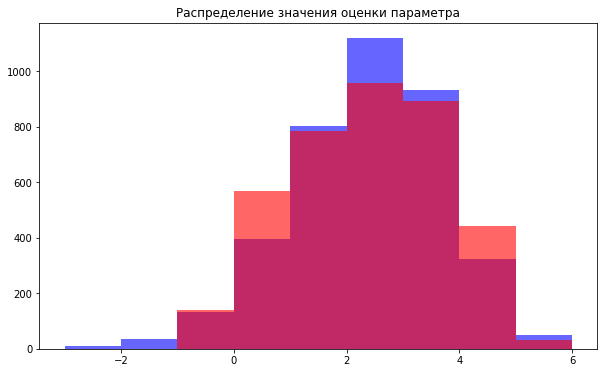

In [27]:

bins = [i + -3 for i in range(10)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    lin_pred,
    bins = bins,
    alpha = 0.6,
    color = 'blue'
)
plt.hist(
    tree_pred,
    bins = bins,
    alpha = 0.6,
    color = 'red'
)
plt.show()